<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/random_sample_imputation_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import  pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('tr.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [7]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
#

In [10]:
x_train['Age_imputed']= x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [11]:
x_test.tail()

,Age,Fare,Age_imputed
796,49.0,25.9292,49.0
815,NaN,0.0000,NaN
629,NaN,7.7333,NaN
421,21.0,7.7333,21.0
448,5.0,19.2583,5.0


In [12]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [13]:
x_train.isnull().sum()

,0
Age,144
Fare,0
Age_imputed,0


In [19]:
x_train

,Age,Fare,Age_imputed
301,NaN,23.2500,52.0
309,30.0,56.9292,30.0
516,34.0,10.5000,34.0
120,21.0,73.5000,21.0
570,62.0,10.5000,62.0
...,...,...,...
715,19.0,7.6500,19.0
767,30.5,7.7500,30.5
72,21.0,73.5000,21.0
235,NaN,7.5500,37.0


<ipython-input-20-931e959215d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
<ipython-input-20-931e959215d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)


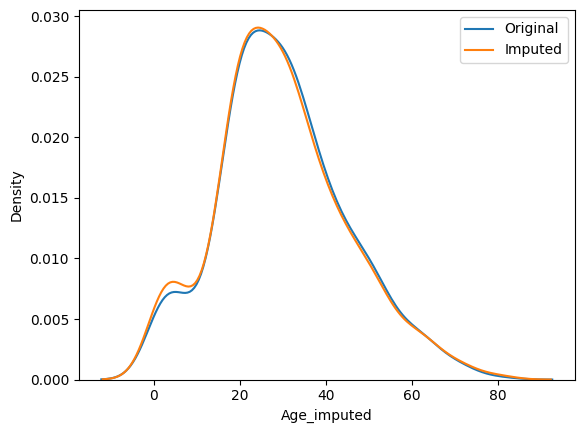

In [20]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [21]:
print('Original variable variance:',x_train['Age'].var())
print('Imputed variable variance:',x_train['Age_imputed'].var())

Original variable variance: 220.7125508594779
Imputed variable variance: 229.2241866825882


In [23]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2144.981210,74.406949,52.489467
Age,74.406949,220.712551,220.712551
Age_imputed,52.489467,220.712551,229.224187


<Axes: >

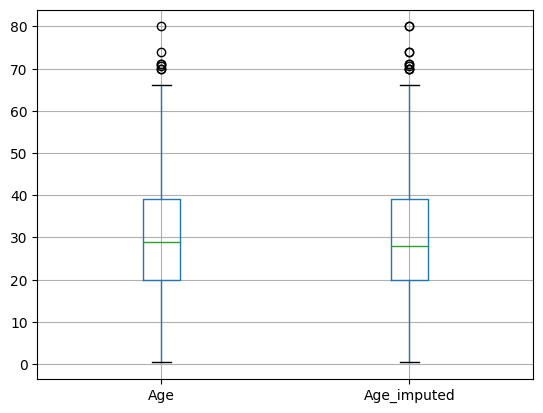

In [24]:
x_train[['Age','Age_imputed']].boxplot()